### 1.  Import the spam dataset and print the first six rows.  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [4]:
df = pd.read_csv('spam_dataset.csv')
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### 2.The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I choose the following three variables as the predictors in the model of spam:
- capital_run_length_average:
- word_freq_free:
- char_freq_!:

Because spam e-mail, especially advertisement emails are full of "!", 'free" and capitalized words, so I choose these three variables.

In [7]:
df_3 = df[['capital_run_length_average:','word_freq_free:','char_freq_!:','spam']]
df_3.head(5)

,capital_run_length_average:,word_freq_free:,char_freq_!:,spam
0,3.756,0.32,0.778,1
1,5.114,0.14,0.372,1
2,9.821,0.06,0.276,1
3,3.537,0.31,0.137,1
4,3.537,0.31,0.135,1


### 3.  Visualize the univariate distribution of each of the variables in the previous question.  

Text(0.5, 1.0, 'spam')

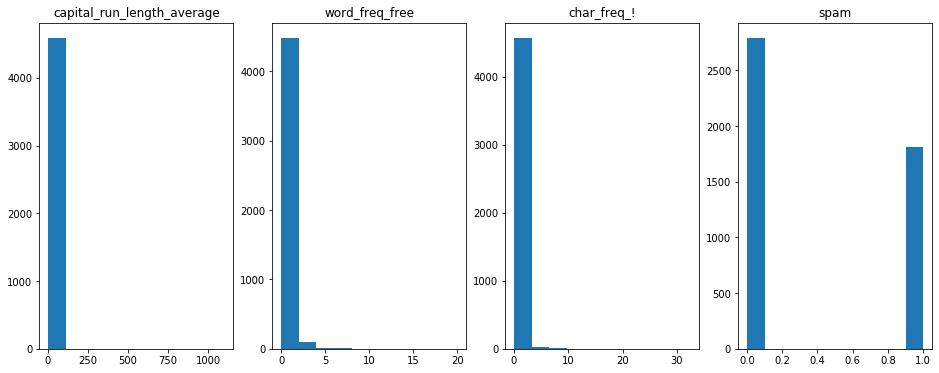

In [26]:
fig, axes=plt.subplots(nrows=1,ncols=4,figsize=(16,6))

axes[0].hist(df_3['capital_run_length_average:'])
axes[0].set_title('capital_run_length_average')
axes[1].hist(df_3['word_freq_free:'])
axes[1].set_title('word_freq_free')
axes[2].hist(df_3['char_freq_!:'])
axes[2].set_title('char_freq_!')
axes[3].hist(df_3['spam'])
axes[3].set_title('spam')

### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

We have learnt 6 models to predict classification problems.
- k-Nearest-Neighbors Classifier
- Logistic Regression (as well as penalized Logistic Regression) 
- Support Vector Machine
- Decision Tree
- Bagged Trees
- Random Forest

### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?



The fundamental purpose to split data into training and test set is to avoid overfitting. All Machine Learning Algorithms face the same trade-off between variance and bias. When we want to increase models' fit to training dataset, we can lower the bias, but face the problem of high variance, and this problem is called overfit. Overfit can significantly reduce the predictability of a model. Hence, we seperate the data first, to test if the model can give good prediction on test data, to avoid such overfitting models.


### 6. What is k-fold cross validation and what do we use it for?

k-fold cross validation involves randomly dividing the set of observations into k groups of approximately equal size. One fold is treated as a validation set, and the method is ﬁt on the remaining k − 1 folds. Then the predictability (using metrics such as mean squared error for regression, or accuracy for classification) is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a diﬀerent group of observations is treated as a validation set.

This method is used to exam the test error rate of the model, thus avoiding the potential overfitting problems of our model. What's more, compared to Leave-One-Out Cross Validation, which may lead to computational intensivity when the sample is large, k-fold CV can significantly reduce computational intensivity.

### 7. How is k-fold cross validation different from stratified k-fold cross validation?

Stratified k-fold cross validation a kind of k-fold CV thatis designed to correct a potential problem raised by k-fold cross validaton - imbalanced data. They are only different on one perspective: Stratification. When we divide data into k flods, Stratified k-fold cross validation requires to use stratified sampling to ensure that each fold of dataset has the same proportion of observations with a given label, thusing avoid the problem of imbalanced data. On the contrary, k-fold CV only does simple random division, which may lead to imbalanced data in some folds.

### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  
- Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  
- Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [9]:
# data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df_3.loc[:, df_3.columns != 'spam']
y = df_3['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Penalized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Set stratified k-folds
skfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)

# Use GridSearchCV to find the best model 
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=skfold)
grid_logit.fit(X_train_scaled, y_train) 

print("PENALIZED LOGISTIC REGRESSION (SCALED DATA)")
print("best parameter of Logistic Regression: {}".format(grid_logit.best_params_))
print("best cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))
print("Test set score: {:.3f}".format(grid_logit.score(X_test_scaled, y_test)))


PENALIZED LOGISTIC REGRESSION (SCALED DATA)
best parameter of Logistic Regression: {'C': 2.7}
best cross-validation score of Logistic Regression: 0.797
Test set score: 0.798


##### Solution 8:
- use GridSearchCV to iterate the parameters from 0.1 to 5.0 to find the best parameter for model
- the prediction error using cross-validation is 1-0.797 = 0.203
- the prediction error using test set is 1-0.798 = 0.202

### 9. Choose a second model from question four.  

In [16]:
# Support Vector Machine
from sklearn.svm import SVC

# Use GridSearchCV to find the best model 
param_grid = {'C': [0.1,1, 10, 100, 1000], 
              'gamma': [10,1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']} 

grid_SVC = GridSearchCV(SVC(),param_grid=param_grid, cv=skfold)
grid_SVC.fit(X_train_scaled, y_train) 

print("SVC (SCALED DATA)")
print("best parameter of SVC: {}".format(grid_SVC.best_params_))
print("best cross-validation score of SVC: {:.3f}".format(grid_SVC.best_score_))
print("Test set score: {:.3f}".format(grid_SVC.score(X_test_scaled, y_test)))

SVC (SCALED DATA)
best parameter of SVC: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
best cross-validation score of SVC: 0.848
Test set score: 0.846


##### Solution 9:
- use GridSearchCV to iterate the parameters C from 0.1 to 1000, and parameter gamma from 0.0001 to 10, to find the best parameter for model
- the prediction error using cross-validation is 1-0.848 = 0.152
- the prediction error using test set is 1-0.846 = 0.154

### 10. Choose a third model from question four. 

In [17]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Use GridSearchCV to find the best model 
max_depth = np.arange(1, 10, 1)
min_samples_leaf = [1, 2, 4]
criterion = ['entropy','gini']

param_grid = {'max_depth' : max_depth,
             'min_samples_leaf' : min_samples_leaf,
             'criterion' : criterion} 

grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid, cv=skfold)
grid_tree.fit(X_train, y_train) 

print("Decision Tree (UNSCALED DATA)")
print("best parameter of Decision Tree: {}".format(grid_tree.best_params_))
print("best cross-validation score of Decision Tree: {:.3f}".format(grid_tree.best_score_))
print("Test set score: {:.3f}".format(grid_tree.score(X_test, y_test)))

Decision Tree (UNSCALED DATA)
best parameter of Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2}
best cross-validation score of Decision Tree: 0.849
Test set score: 0.853


##### Solution 10:
- use GridSearchCV to iterate the parameters (including max_depth (number of times internal nodes are split), min_samples_leaf(threshold for minimum number of observations per terminal node) and criterion), to find the best parameter for model.
- the prediction error using cross-validation is 1-0.849 = 0.151
- the prediction error using test set is 1-0.853 = 0.147

### 11.  Choose a fourth model from question four.  

In [20]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 10, 1)}
# Use GridSearchCV to find the best model 

grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid, cv=skfold)
grid_knn.fit(X_train_scaled, y_train) 

print("KNN (SCALED DATA)")
print("best parameter of KNN Classifier: {}".format(grid_knn.best_params_))
print("best cross-validation score of KNeighborsClassifier: {:.3f}".format(grid_knn.best_score_))
print("Test set score: {:.3f}".format(grid_knn.score(X_test_scaled, y_test)))

KNN (SCALED DATA)
best parameter of KNN Classifier: {'n_neighbors': 7}
best cross-validation score of KNeighborsClassifier: 0.849
Test set score: 0.839


##### Solution 11:
- use GridSearchCV to iterate the parameters n, to find the best parameter for model.
- the prediction error using cross-validation is 1-0.849 = 0.151
- the prediction error using test set is 1-0.839 = 0.161

### 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  

##### based on the preformance of four models, Decision Tree has the best test accuracy and cross-validation score.

add "word_freq_george", "word_freq_650" and "char_freq_(:" to current model

In [21]:
#Decision Tree (Best Model)

#add "word_freq_george", "word_freq_650" and "char_freq_(:" to current model
X = df[["capital_run_length_average:","word_freq_free:","char_freq_!:",
        'word_freq_george:',"word_freq_650:","char_freq_(:"]]
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 


# Use GridSearchCV to find the best model 
max_depth = np.arange(1, 10, 1)
min_samples_leaf = [1, 2, 4]
criterion = ['entropy','gini']

param_grid = {'max_depth' : max_depth,
             'min_samples_leaf' : min_samples_leaf,
             'criterion' : criterion} 

grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid, cv=skfold)
grid_tree.fit(X_train, y_train) 

print("Decision Tree (UNSCALED DATA)")
print("best cross-validation score of Decision Tree: {:.3f}".format(grid_tree.best_score_))
print("Test set score: {:.3f}".format(grid_tree.score(X_test, y_test)))

Decision Tree (UNSCALED DATA)
best cross-validation score of Decision Tree: 0.861
Test set score: 0.859


##### Solution 12:
- The model does a better job in predicting test dataset, increasing the accuracy from 0.852 to 0.862

### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

In [22]:
#Preprossessing the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Penalized Regression Model
C = {'C': np.arange(0.1, 5, 0.1)}
grid_logit = GridSearchCV(LogisticRegression(),param_grid=C, cv=skfold)
grid_logit.fit(X_train_scaled, y_train) 

print("PENALIZED LOGISTIC REGRESSION (SCALED DATA)")
print("best cross-validation score of Logistic Regression: {:.3f}".format(grid_logit.best_score_))
print("Test set score: {:.3f}".format(grid_logit.score(X_test_scaled, y_test)))

PENALIZED LOGISTIC REGRESSION (SCALED DATA)
best cross-validation score of Logistic Regression: 0.815
Test set score: 0.811


In [75]:
# SVM
param_grid = {'C': [0.1,1, 10, 100, 1000], 
              'gamma': [10,1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']} 

grid_SVC = GridSearchCV(SVC(),param_grid=param_grid, cv=skfold)
grid_SVC.fit(X_train_scaled, y_train) 

print("SVC (SCALED DATA)")
print("best cross-validation score of SVC: {:.3f}".format(grid_SVC.best_score_))
print("Test set score: {:.3f}".format(grid_SVC.score(X_test_scaled, y_test)))

SVC (SCALED DATA)
best cross-validation score of SVC: 0.855
Test set score: 0.850


In [25]:
#KNN Classifier
param_grid = {'n_neighbors': np.arange(1, 10, 1)}

grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid, cv=skfold)
grid_knn.fit(X_train_scaled, y_train) 

print("KNN (SCALED DATA)")
print("best cross-validation score of KNeighborsClassifier: {:.3f}".format(grid_knn.best_score_))
print("Test set score: {:.3f}".format(grid_knn.score(X_test_scaled, y_test)))

KNN (SCALED DATA)
best cross-validation score of KNeighborsClassifier: 0.863
Test set score: 0.862


##### Solution 13
- I choose Decision Tree. Among all the models, Decision Tree outperform others by providing the best test data prediction accuracy and highest cross-validation score. What's more, it does not require scaling the data, and it has a fast processing speed. That's why I choose it.

### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

I believe the frequency of word "sale", might be a good predictor of spam emails. Because spam emails are predominantly advertisement email, so "sale" should be a highly repeated word in these e-mails, thus making it a good predictor of spam.

### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

- K-Nearest-Neighborhood Regression
- Linear Regression (including Ridge and Lasso)
- SVM
- Decision Tree
- Bagged Trees
- Random Forest